# Degree Distribution Plot and Exponent Estimation

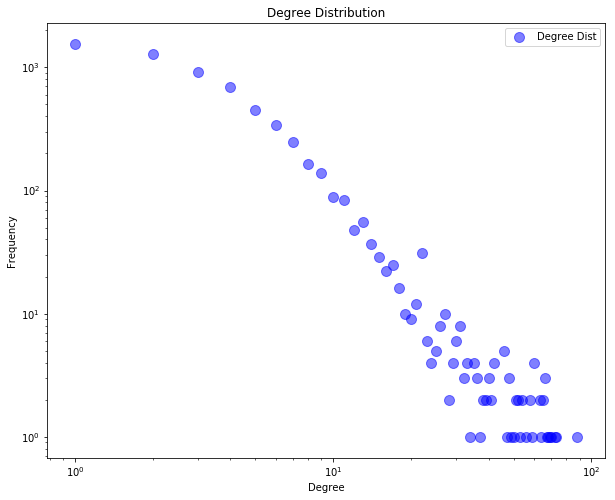

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections

# load in preprocessed graph
G = nx.read_graphml('graphs/metagraph.graphml')

# compute degree distribution
deg = nx.degree(G)
deg = [deg[1] for deg in deg]
deg = collections.Counter(deg)

# create plot
fig = plt.figure(figsize=(10,8))
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

ax.scatter(deg.keys(), deg.values(), alpha=0.5, color='b', s=100)
ax.legend(['Degree Dist'])

In [4]:
# compute empirical ccdf
ccdf = {}
tdeg = sum(deg.values())
for k in sorted(deg.items()):
    ccdf[k[0]] = tdeg
    tdeg -= k[1]
ccdf.pop(0,None)
    
logX = np.log(list(ccdf.keys()))
logy = np.log(list(ccdf.values()))

# create matrix and vectors
X = np.vstack([logX, np.ones(len(logX))]).T
y = logy

# compute least squares result
m, c = np.linalg.lstsq(X, y)[0]

# print result for alpha
alpha_ccdf = -m
alpha_hat2 = alpha_ccdf+1
print('Estimated CCDF alpha: {}'.format(alpha_ccdf))
print('Estimated PDF alpha 2: {}'.format(alpha_hat2))

Estimated CCDF alpha: 1.8918268953215482
Estimated PDF alpha 2: 2.8918268953215485


/home/smgr/lab/env/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
